In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [4]:
print("Train:", train.shape)
print("Test:", test.shape)

Train: (137, 43)
Test: (100000, 42)


In [5]:
train.columns[train.isna().any()].tolist()

[]

In [6]:
test.columns[test.isna().any()].tolist()

[]

In [7]:
#Seperate categorical from numberical variables for analysis 
numerical_features = train.select_dtypes([np.number]).columns.tolist()
categorical_features = train.select_dtypes(exclude = [np.number,np.datetime64]).columns.tolist()

In [8]:
categorical_features

['Open Date', 'City', 'City Group', 'Type']

In [9]:
numerical_features

['Id',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 'P25',
 'P26',
 'P27',
 'P28',
 'P29',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P36',
 'P37',
 'revenue']

In [10]:
train[numerical_features].head()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,4,5.0,4.0,4.0,2,2,5,4,5,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,4,5.0,4.0,4.0,1,2,5,5,5,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2,4.0,2.0,5.0,2,3,5,5,5,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,6,4.5,6.0,6.0,4,4,10,8,10,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,3,4.0,3.0,4.0,2,2,5,5,5,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [11]:
train[categorical_features].head()

,Open Date,City,City Group,Type
0,07/17/1999,İstanbul,Big Cities,IL
1,02/14/2008,Ankara,Big Cities,FC
2,03/09/2013,Diyarbakır,Other,IL
3,02/02/2012,Tokat,Other,IL
4,05/09/2009,Gaziantep,Other,IL


## Questions to be answered
- Which is the best city to Open a resutrant ?

- What is the best time in year to open a resutrant in that city ?

- What is the best type of resturant to be opened ?

In [12]:
train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64


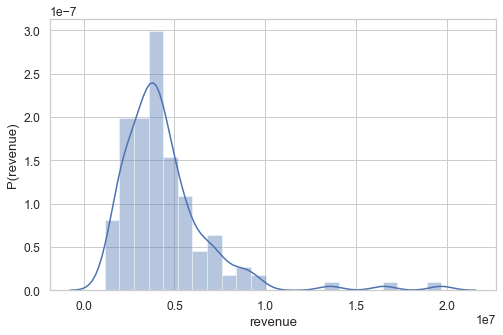

In [13]:
print(train['revenue'].describe())
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    train['revenue'], norm_hist=False, kde=True
).set(xlabel='revenue', ylabel='P(revenue)');

## 위 그래프 분석
- 위에서 보여지는 데이터를 봣을때 왜도가 왼쪽으로 치우져져 있고 대부분 revnue 분포가 1.0 이하에 분포해 있는 것을 확인할 수 있음
- 1.0 이상으로 가지는 값들은 아웃라이어 제거해야 될 가능성

In [14]:
train[train['revenue'] > 10000000 ]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
16,16,01/07/2000,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,...,2.0,0,0,0,0,0,0,0,0,19696939.0
75,75,10/15/2005,İstanbul,Big Cities,FC,5,5.0,4.0,5.0,1,...,0.0,0,0,0,0,0,0,0,0,16549064.0
99,99,12/18/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,1.0,5,5,4,2,5,5,5,3,13575224.0


- 이 큰도시에 해당되는 세개의 레스토랑은 1999년, 2000, 2005년에 오픈했음에도 불구하고 눈에 띄게 큰 수익을 올렸다는 점

In [15]:
train = train[train['revenue'] < 10000000 ]
train.reset_index(drop=True)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
130,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
131,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
132,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [16]:
train.shape

(134, 43)

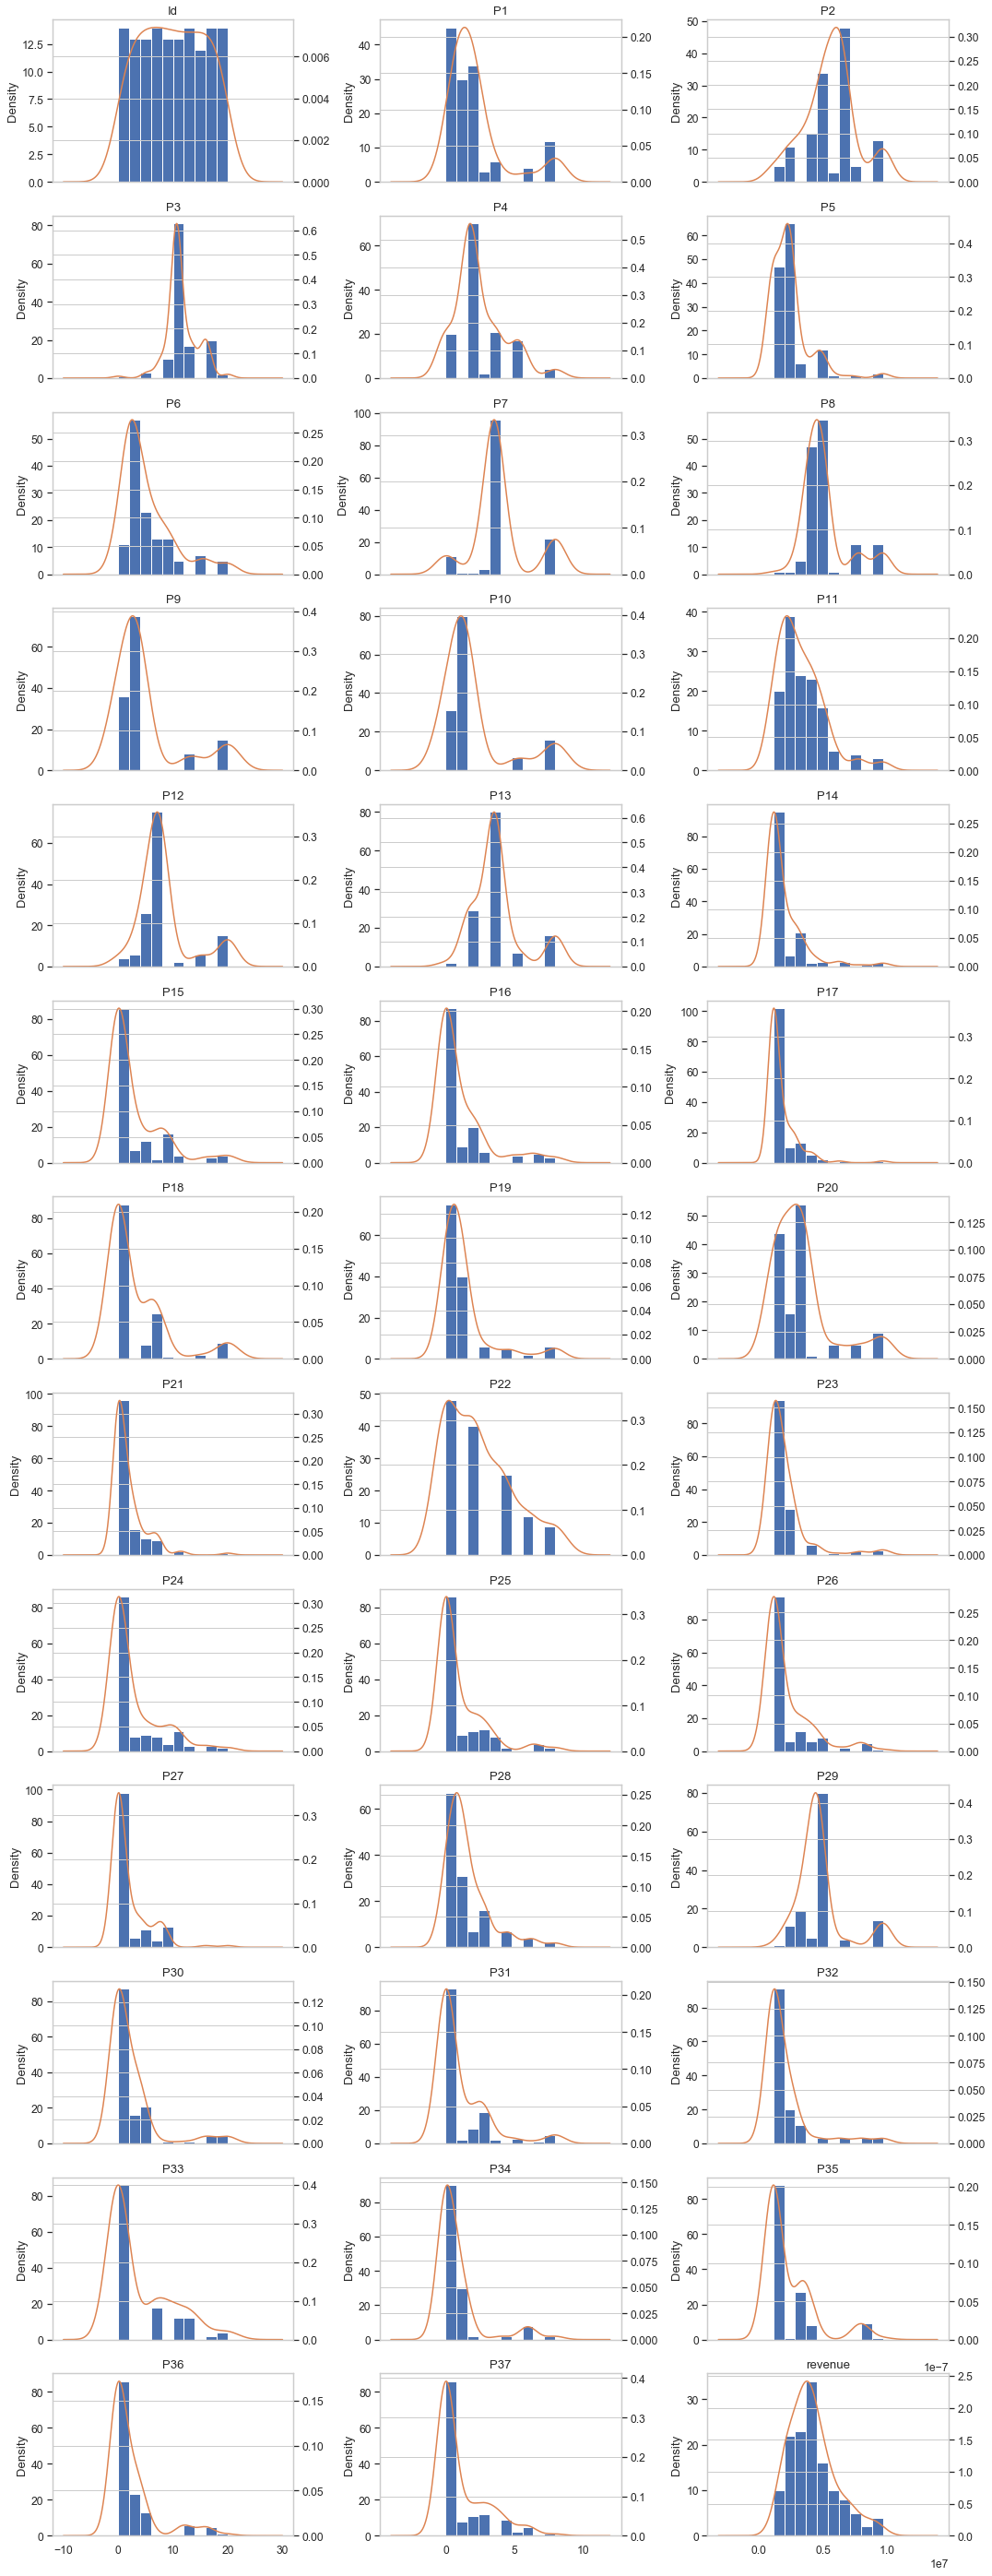

In [17]:
#train[numerical_features].hist(figsize=(30, 35), layout=(12, 4));

k = len(train[numerical_features].columns)
n = 3
m = (k - 1) // n + 1 ## Floor Division (also called Integer Division)
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(train[numerical_features].iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

fig.tight_layout()

## 위 그래프 분석
- 데이터 분포가 대부분 왼쪽으로 치우쳐져 있는것을 확인 할 수 있음
- 또한 p37과 같은 데이터를 예로들면 대부분 0에 값이 몰려있는 것을 알 수 있고 잘못 입력되어있는 null값이거나 어떤한 의미를 가지고 있을지 생각해봐야될 필요가 있음

In [18]:
train[train['P37']  == 0].shape

(86, 43)

In [19]:
##  인구 연령 성별은 아닌거같음... 
train['P37'].value_counts()

0    86
3    12
2    11
4     9
1     8
6     5
5     2
8     1
Name: P37, dtype: int64

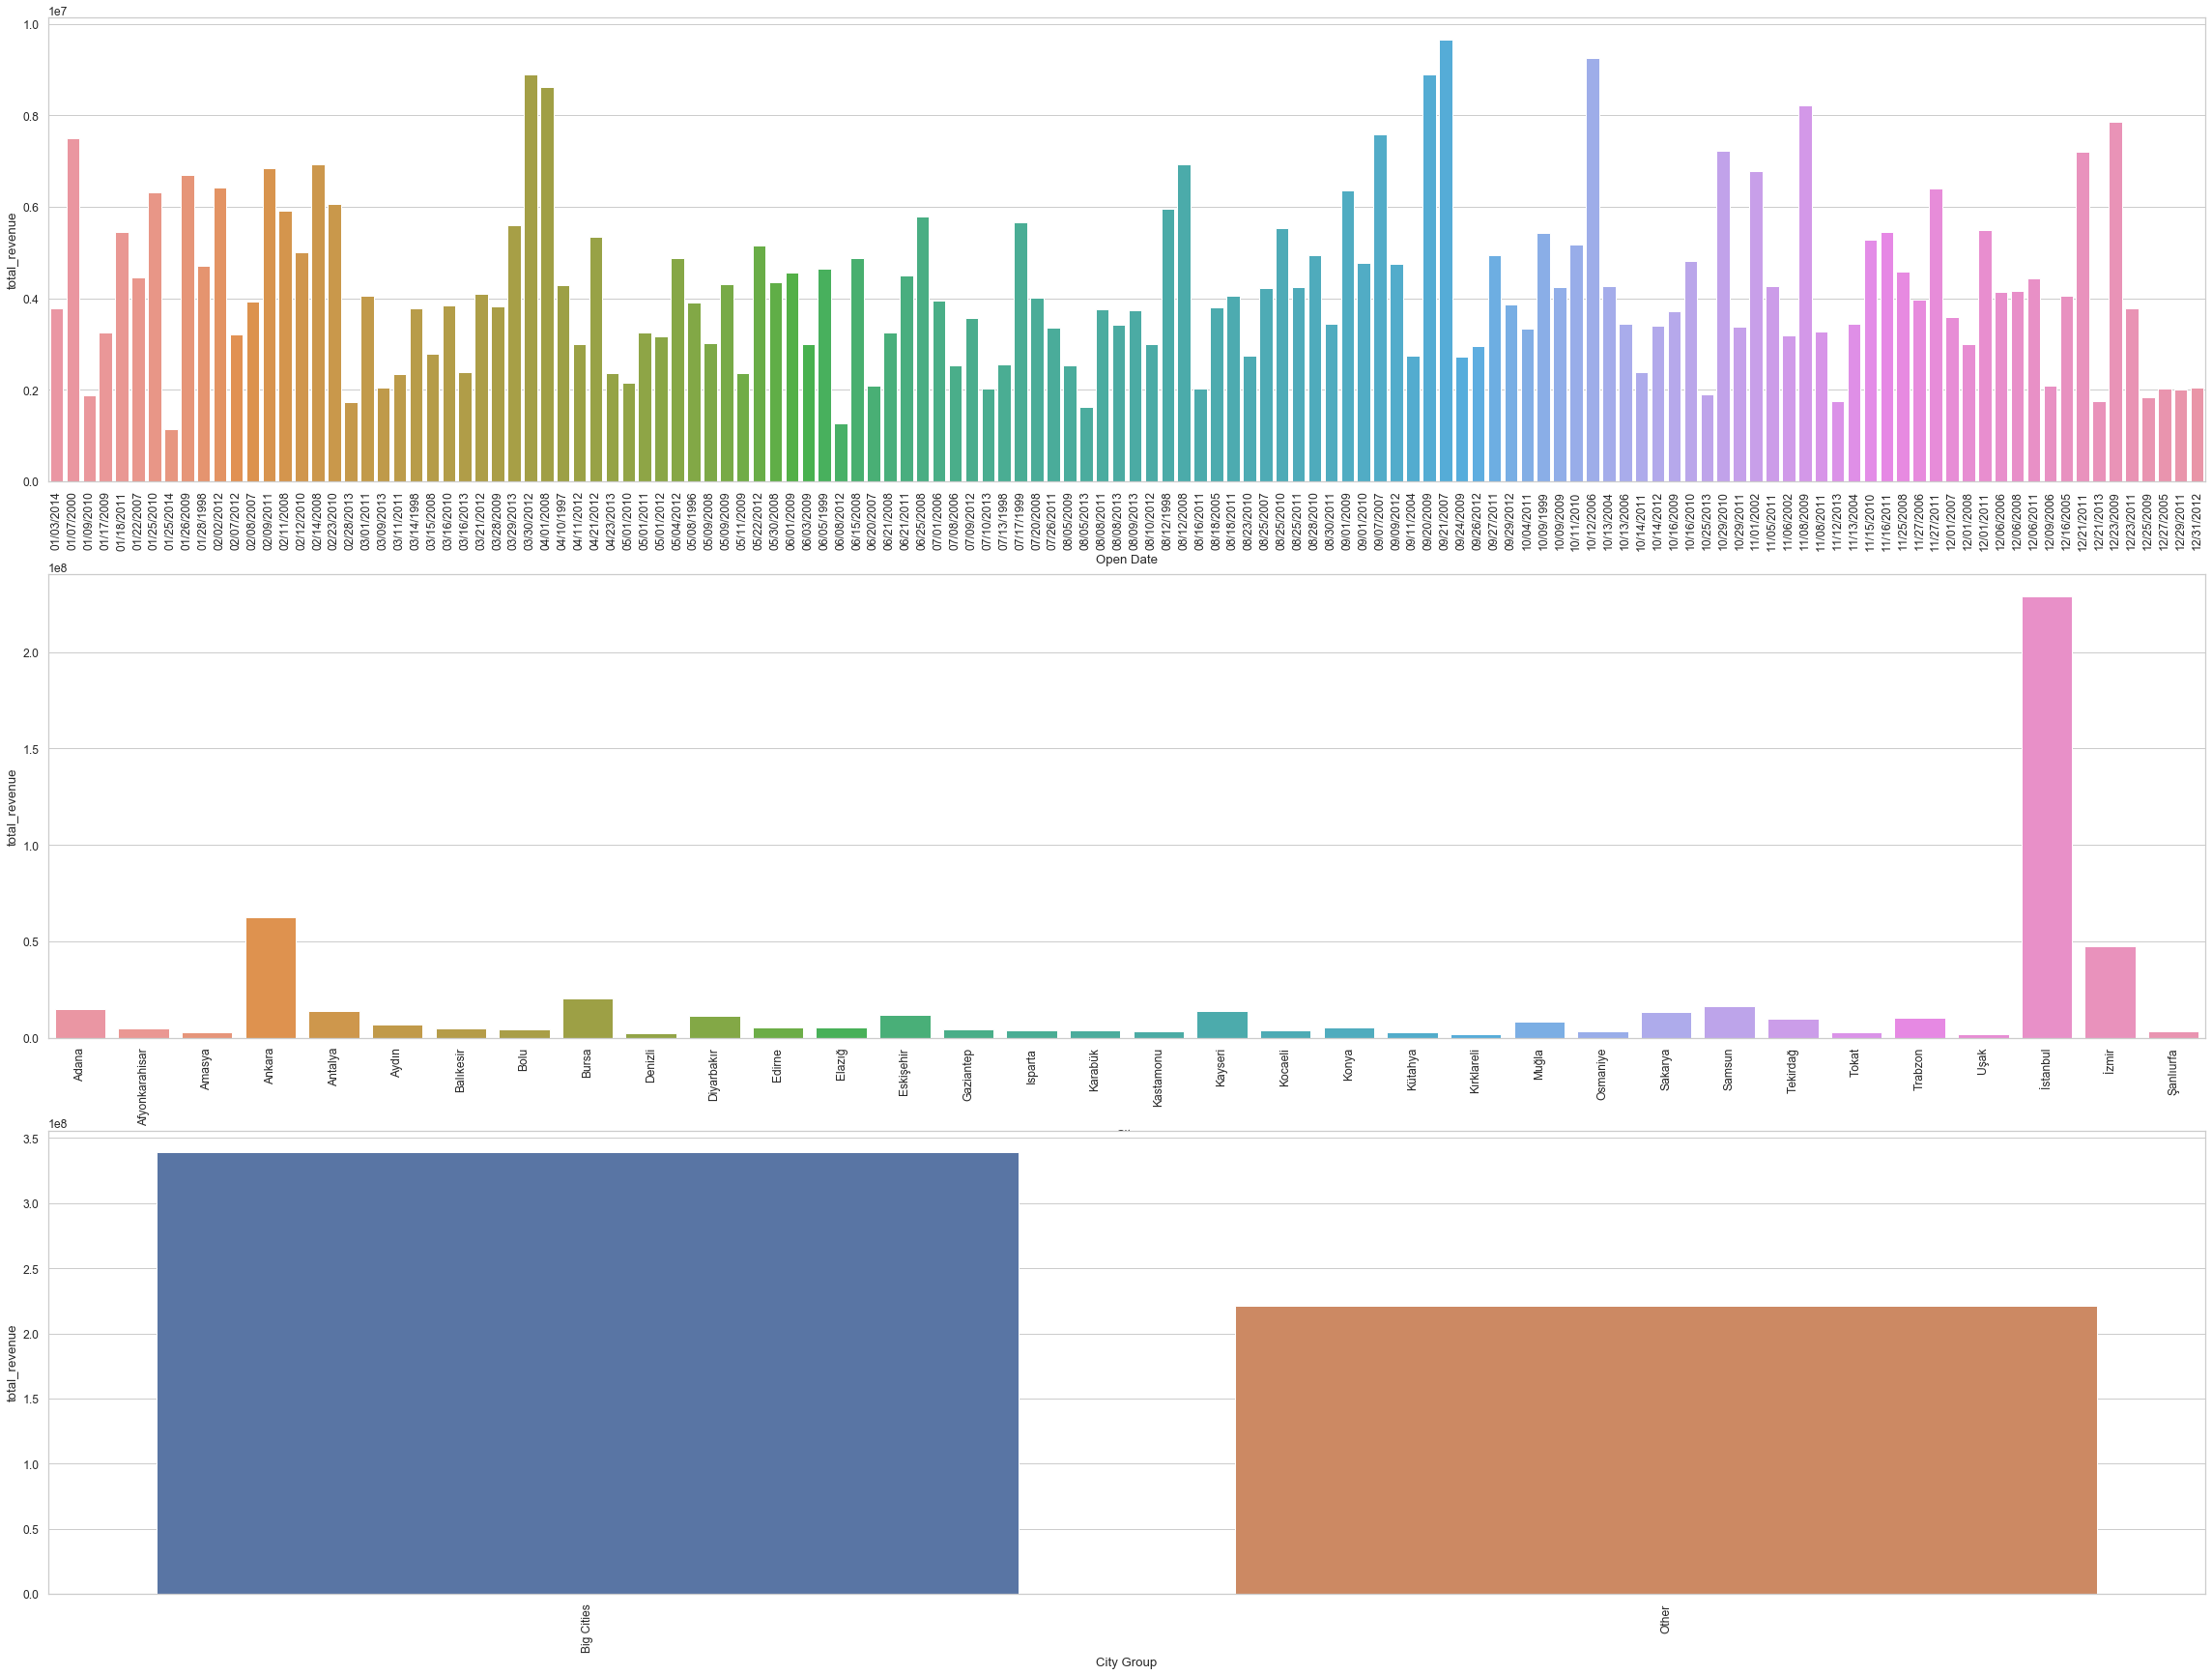

In [20]:
fig, ax = plt.subplots(3, 1, figsize=(40, 30))
for variable, subplot in zip(categorical_features, ax.flatten()):
    df_2 = train[[variable,'revenue']].groupby(variable).revenue.sum().reset_index()
    df_2.columns = [variable,'total_revenue']
    sns.barplot(x=variable, y='total_revenue', data=df_2 , ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

## 위그래프 분석
- 범주형 변수차트에 따르면 이스탄불이 다른 도시와 비교할때 가장 많은 수익을 내고 있다는 것을 확인 가능
- 이스탄불에서 레스토랑을 여는 것이 이득일지? 왜 매출이 많은지 big_city?
- 큰 도시 그룹 즉, 대도시의 경우가 큰 매출을 올리고 있는것을 알 수 있음
- dt 드라이브 스루에 대한 판매량은 너무 저조하기에 제외시키는 것이 맞을거같고 인라인 또는 푸드코드에서 판매하는 것이 수익이 가장 높음

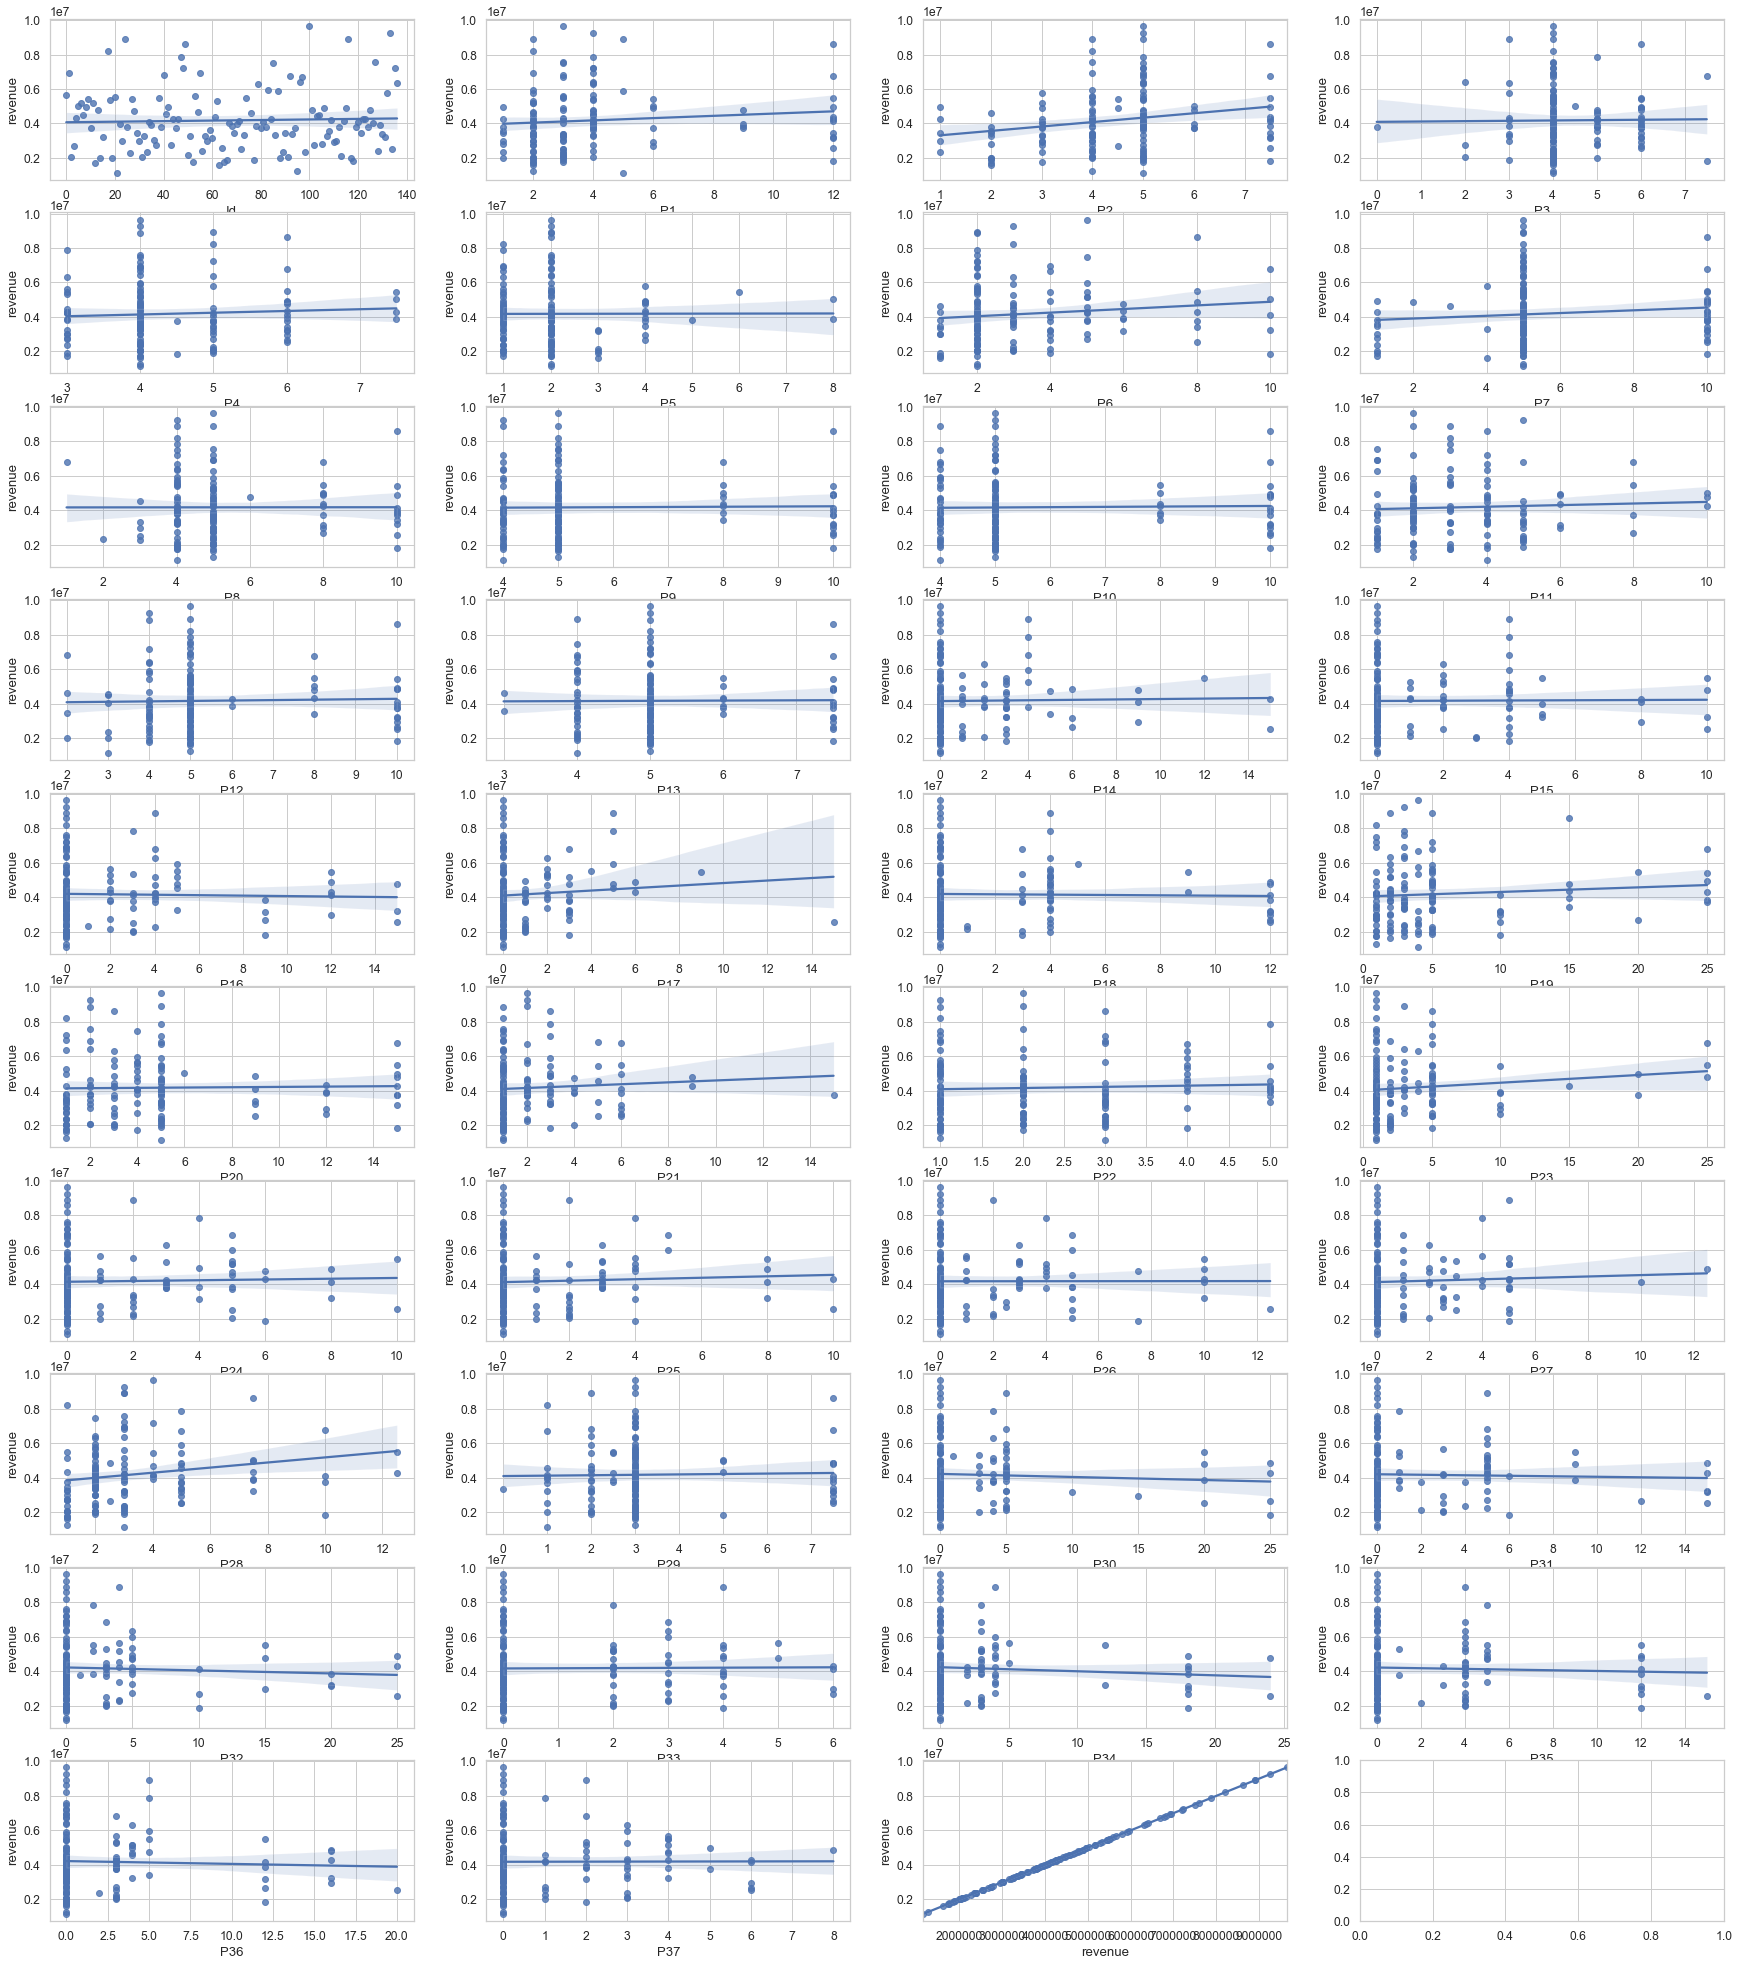

In [911]:
fig, ax = plt.subplots(10, 4, figsize=(30, 35))
for variable, subplot in zip(numerical_features, ax.flatten()):
    sns.regplot(x=train[variable], y=train['revenue'], ax=subplot)

## 위 그래프 분석
- 

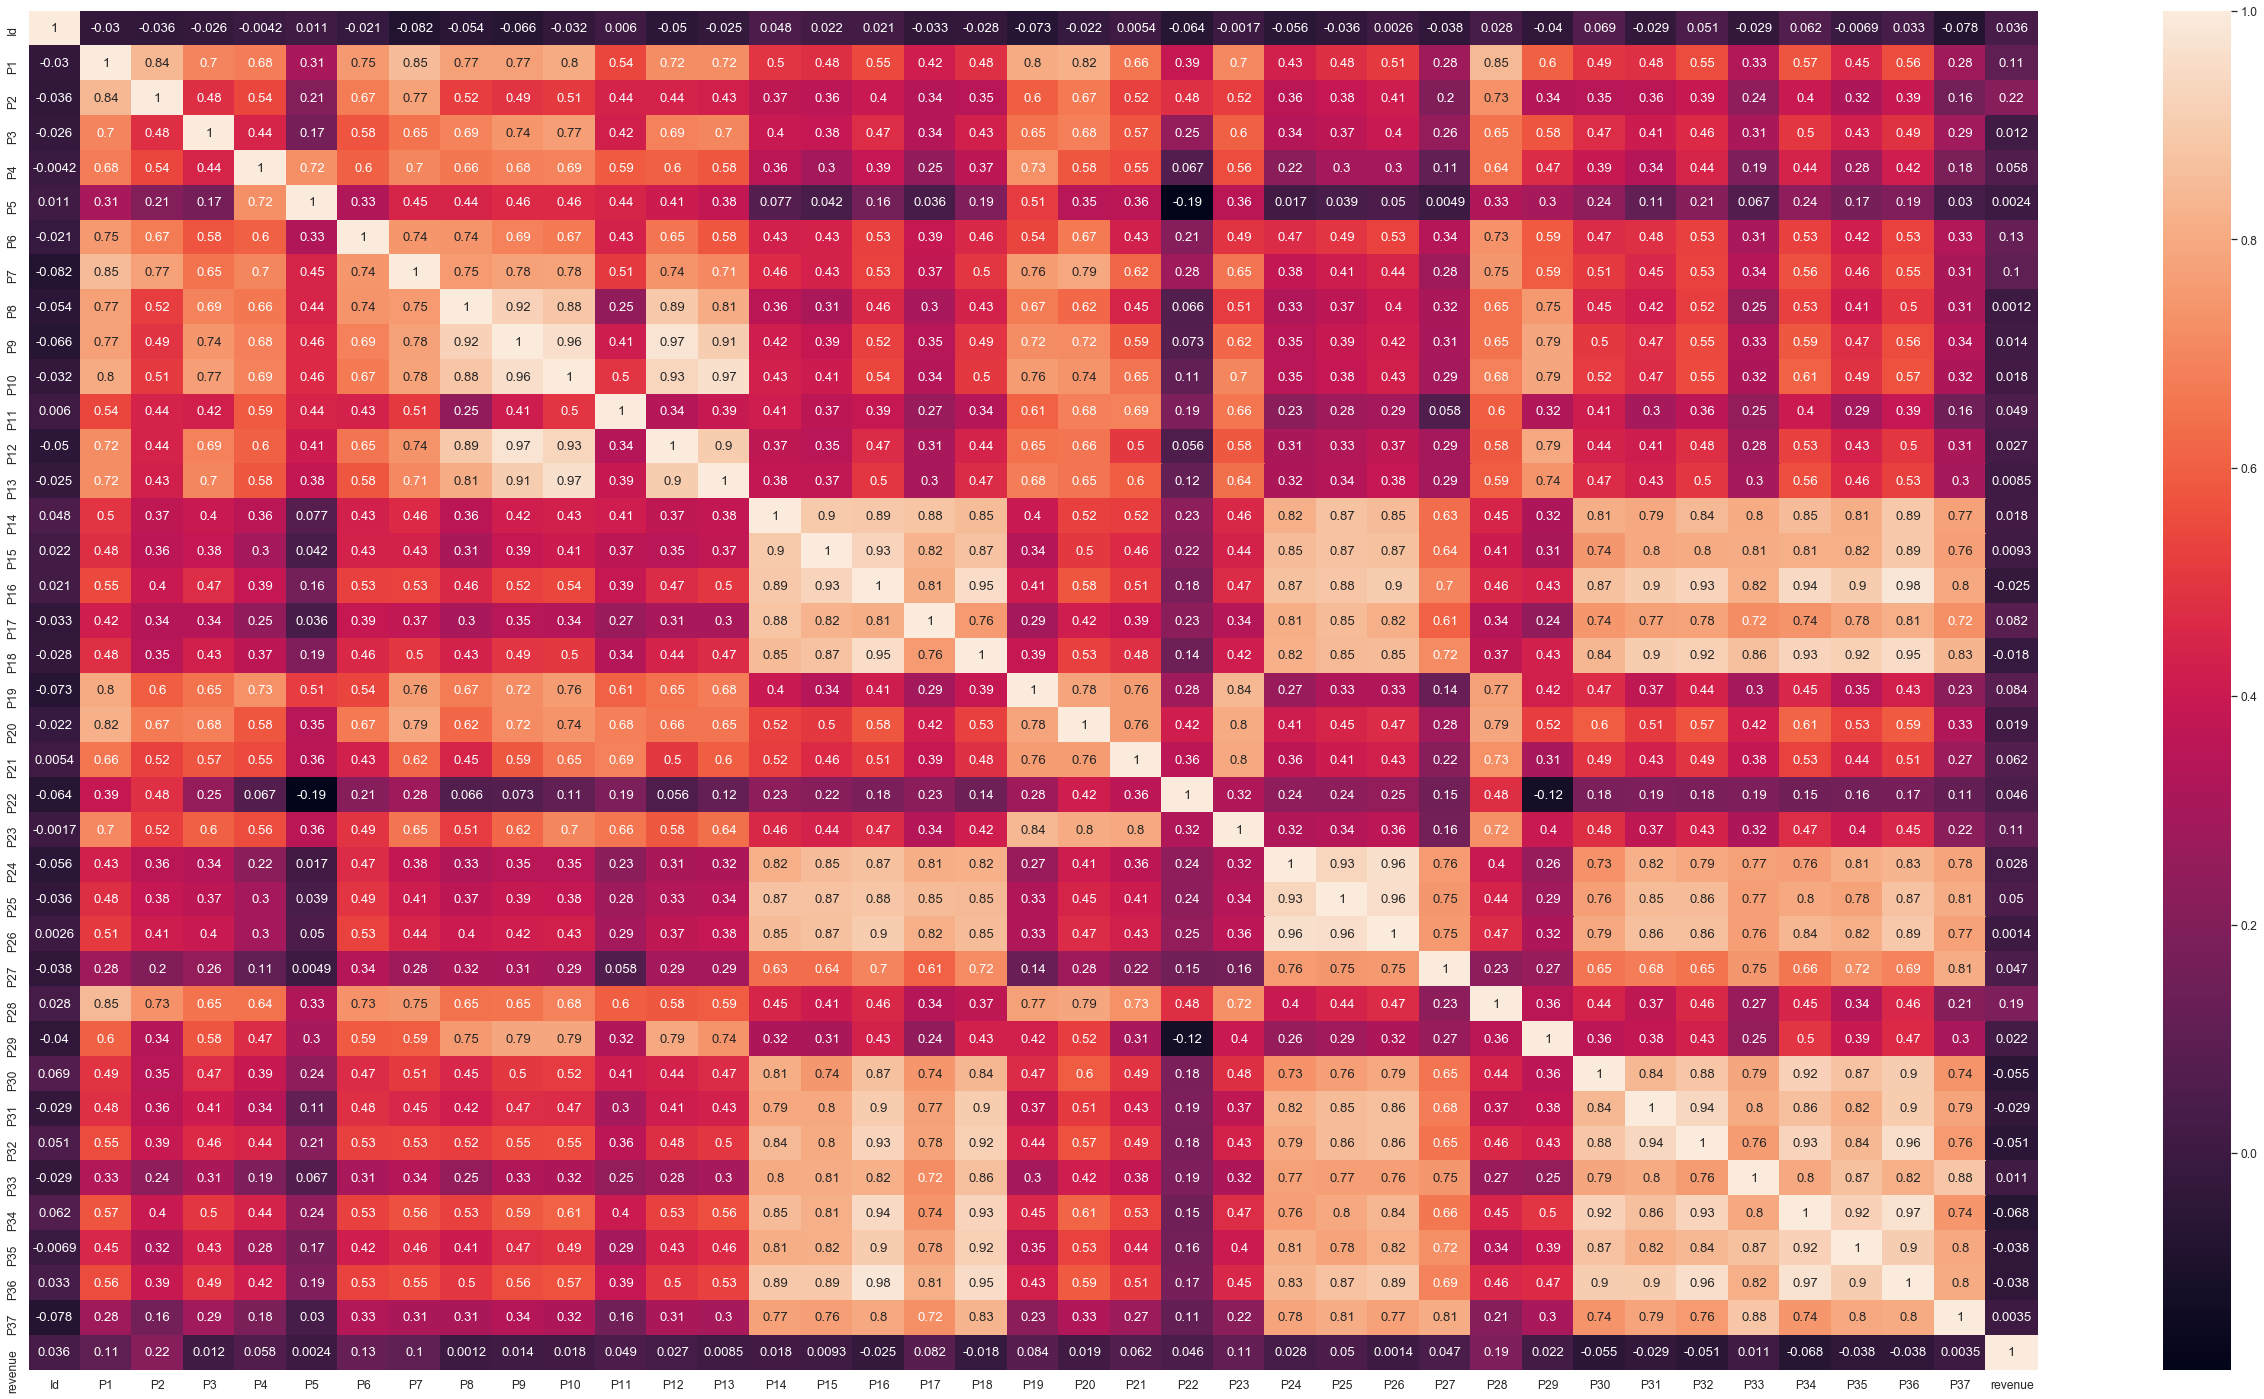

In [912]:
plt.figure(figsize=(45,25))
sns.heatmap(train.corr(),annot=True)

## 위 그래프 분석 
- 히트맵에서 보여주듯이 revenue 즉 수익과 p1~p37 변수들과의 연관성이 없음을 확인할 수 있었음

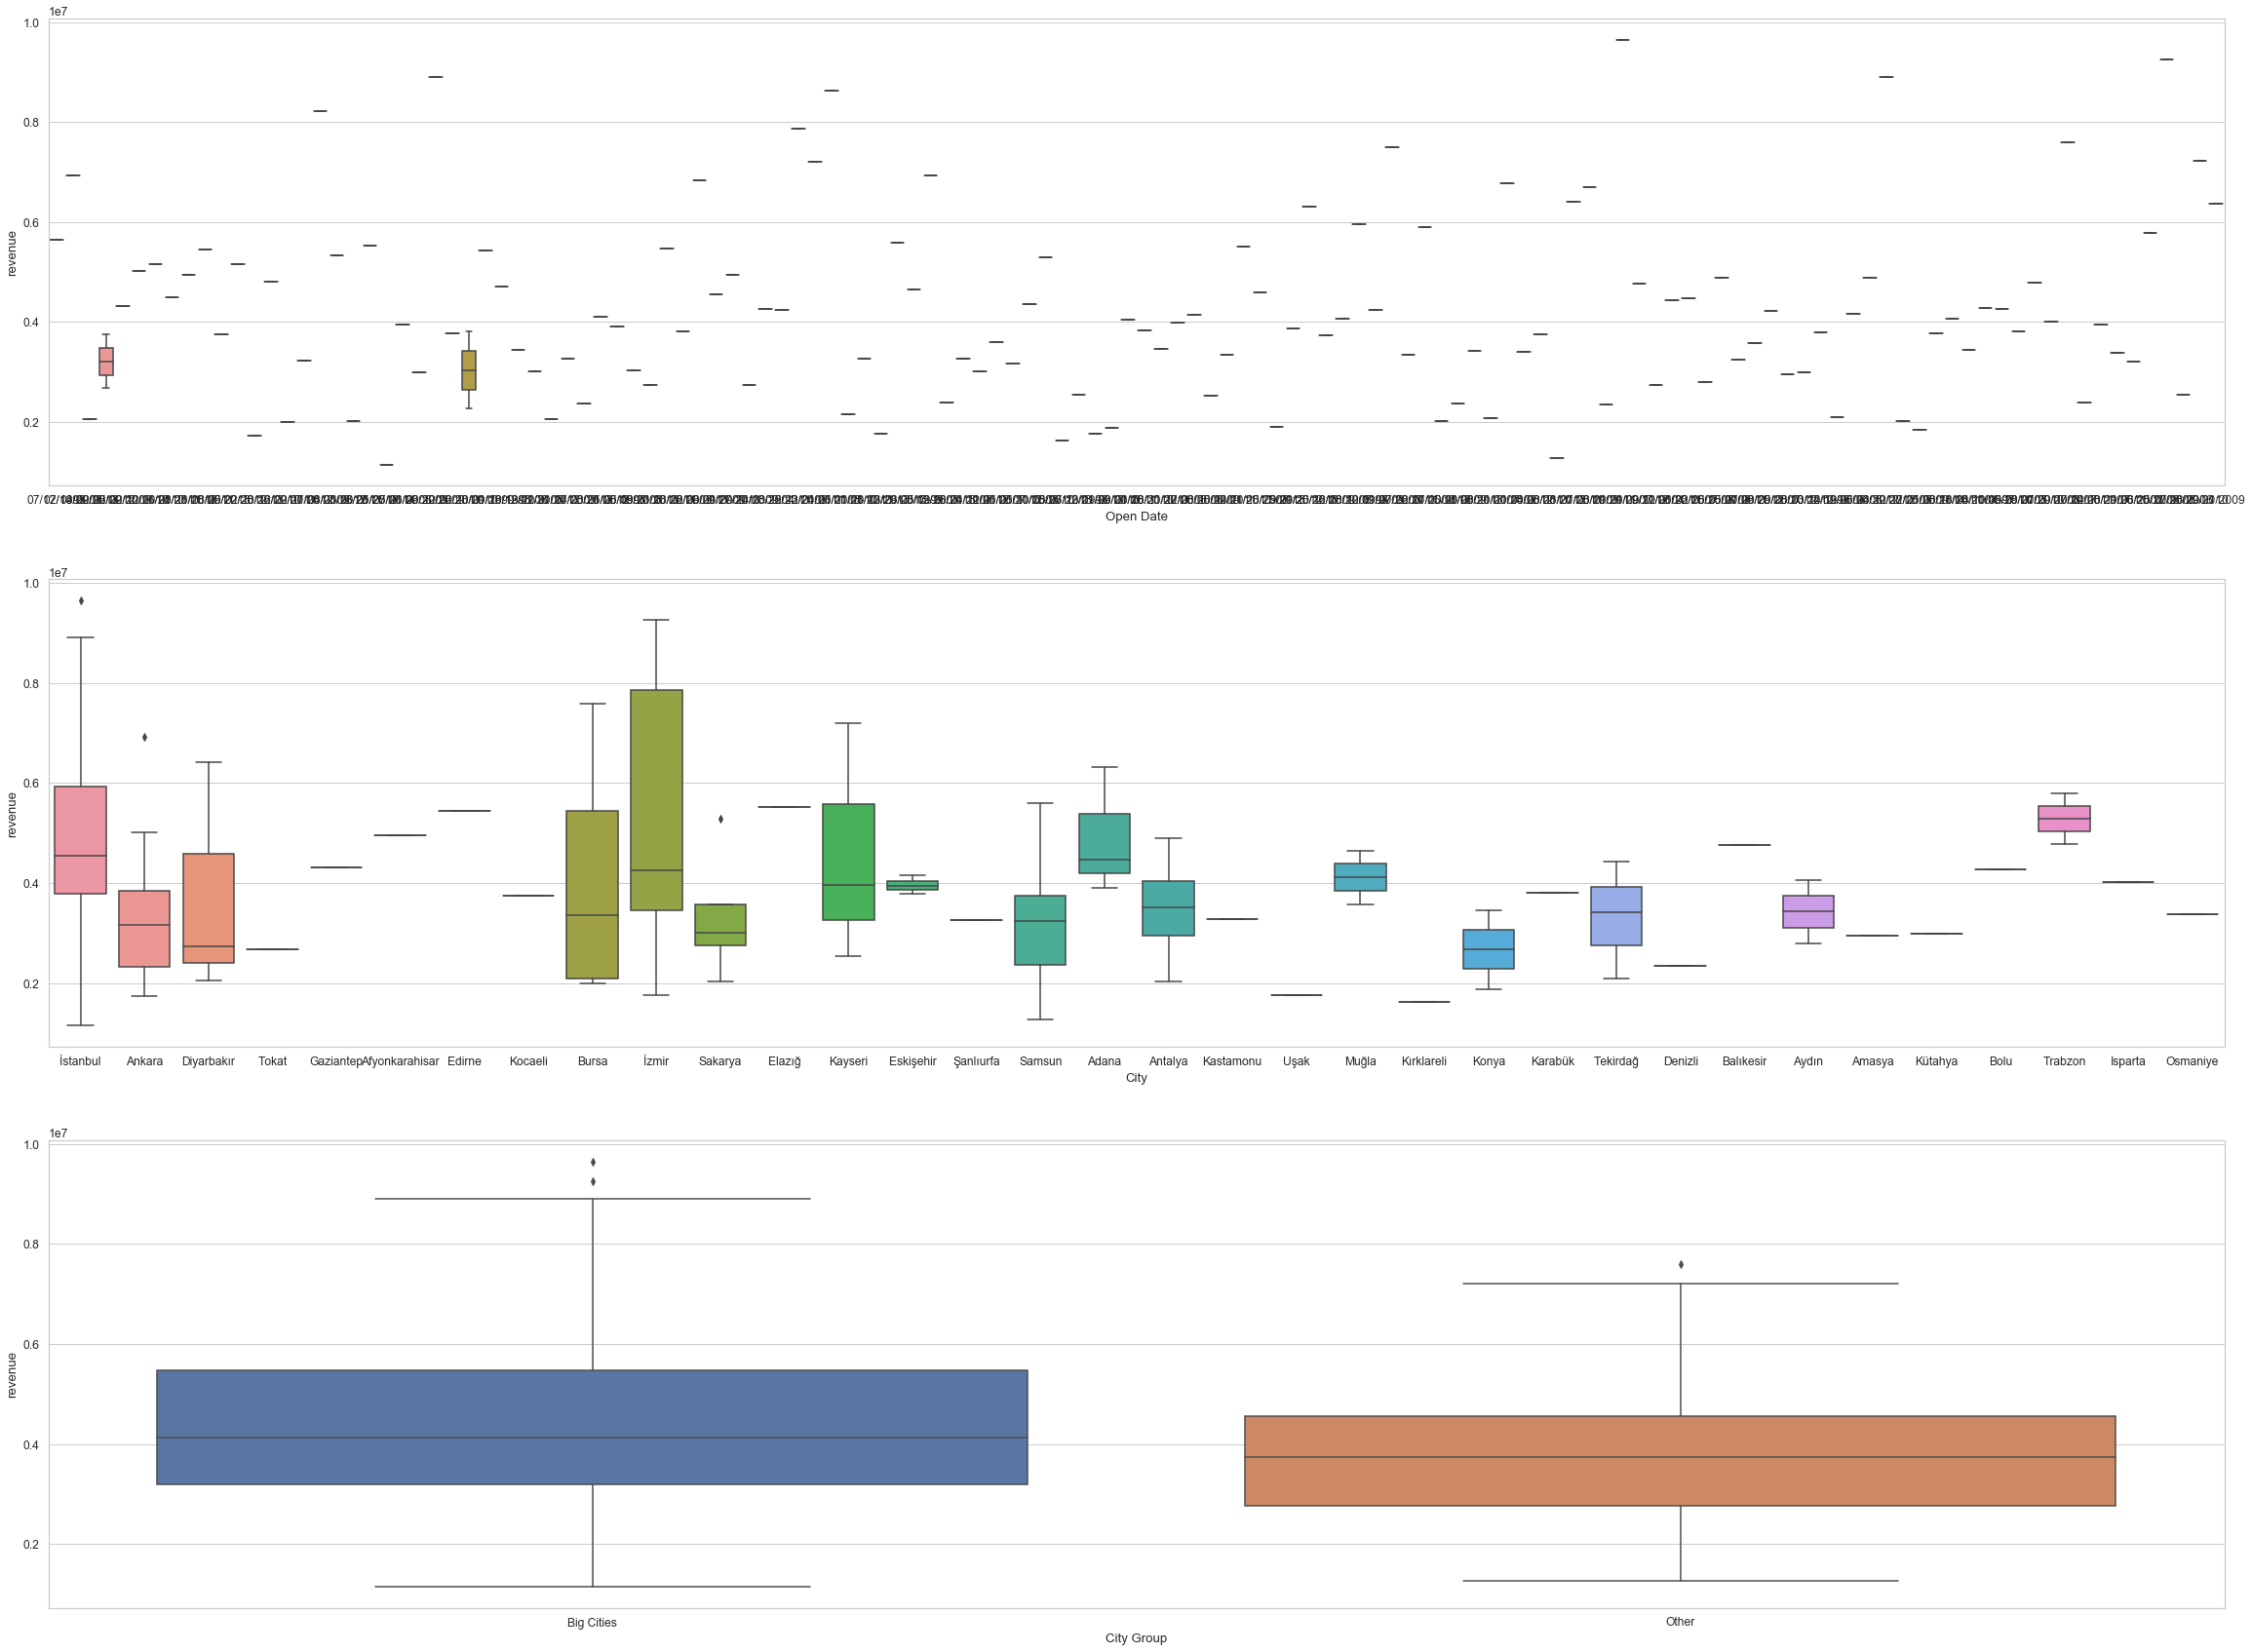

In [913]:
fig, ax = plt.subplots(3, 1, figsize=(40, 30))
for var, subplot in zip(categorical_features, ax.flatten()):
    sns.boxplot(x=var, y='revenue', data=train, ax=subplot)

In [914]:
train['City'].value_counts()

İstanbul          47
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Antalya            4
Sakarya            4
Eskişehir          3
Kayseri            3
Diyarbakır         3
Tekirdağ           3
Adana              3
Konya              2
Muğla              2
Aydın              2
Trabzon            2
Kütahya            1
Balıkesir          1
Isparta            1
Uşak               1
Edirne             1
Tokat              1
Kastamonu          1
Amasya             1
Kırklareli         1
Şanlıurfa          1
Kocaeli            1
Bolu               1
Afyonkarahisar     1
Gaziantep          1
Denizli            1
Osmaniye           1
Karabük            1
Elazığ             1
Name: City, dtype: int64

In [22]:
test['City'].value_counts()

İstanbul          34087
Ankara             8720
İzmir              6465
Antalya            5911
Kocaeli            4364
Mersin             2735
Adana              2514
Balıkesir          2463
Bursa              2441
Muğla              1823
Aydın              1617
Tekirdağ           1577
Konya              1576
Gaziantep          1487
Edirne             1230
Manisa             1227
Çanakkale           965
Denizli             964
Diyarbakır          954
Hatay               951
Zonguldak           926
Eskişehir           900
Trabzon             660
Aksaray             650
Bolu                631
Yalova              630
Kırıkkale           622
Malatya             616
Mardin              610
Şanlıurfa           609
Batman              604
Sakarya             604
Rize                345
Artvin              344
Bilecik             339
Afyonkarahisar      331
Nevşehir            328
Sivas               326
Samsun              324
Kayseri             323
Erzincan            319
Kırşehir        

In [915]:
sum_city_rev = train[['City','revenue']].groupby('City').sum()

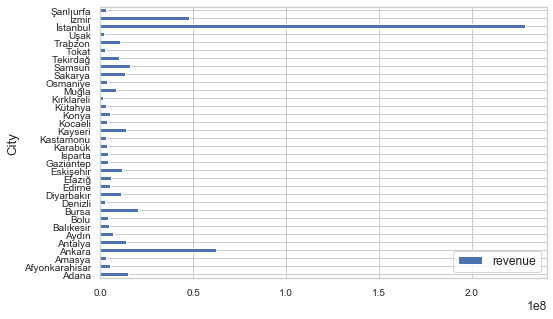

In [916]:
sum_city_rev.plot(kind="barh",fontsize=10)

In [917]:
avg_city_rev = train[['City','revenue']].groupby('City').mean()

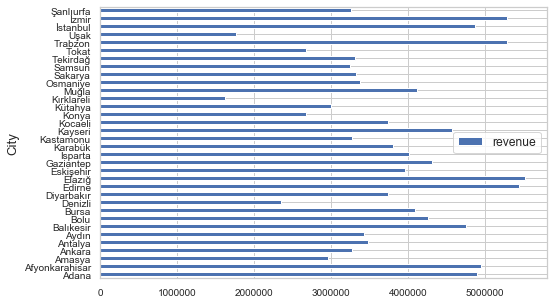

In [918]:
avg_city_rev.plot(kind="barh",fontsize=10)

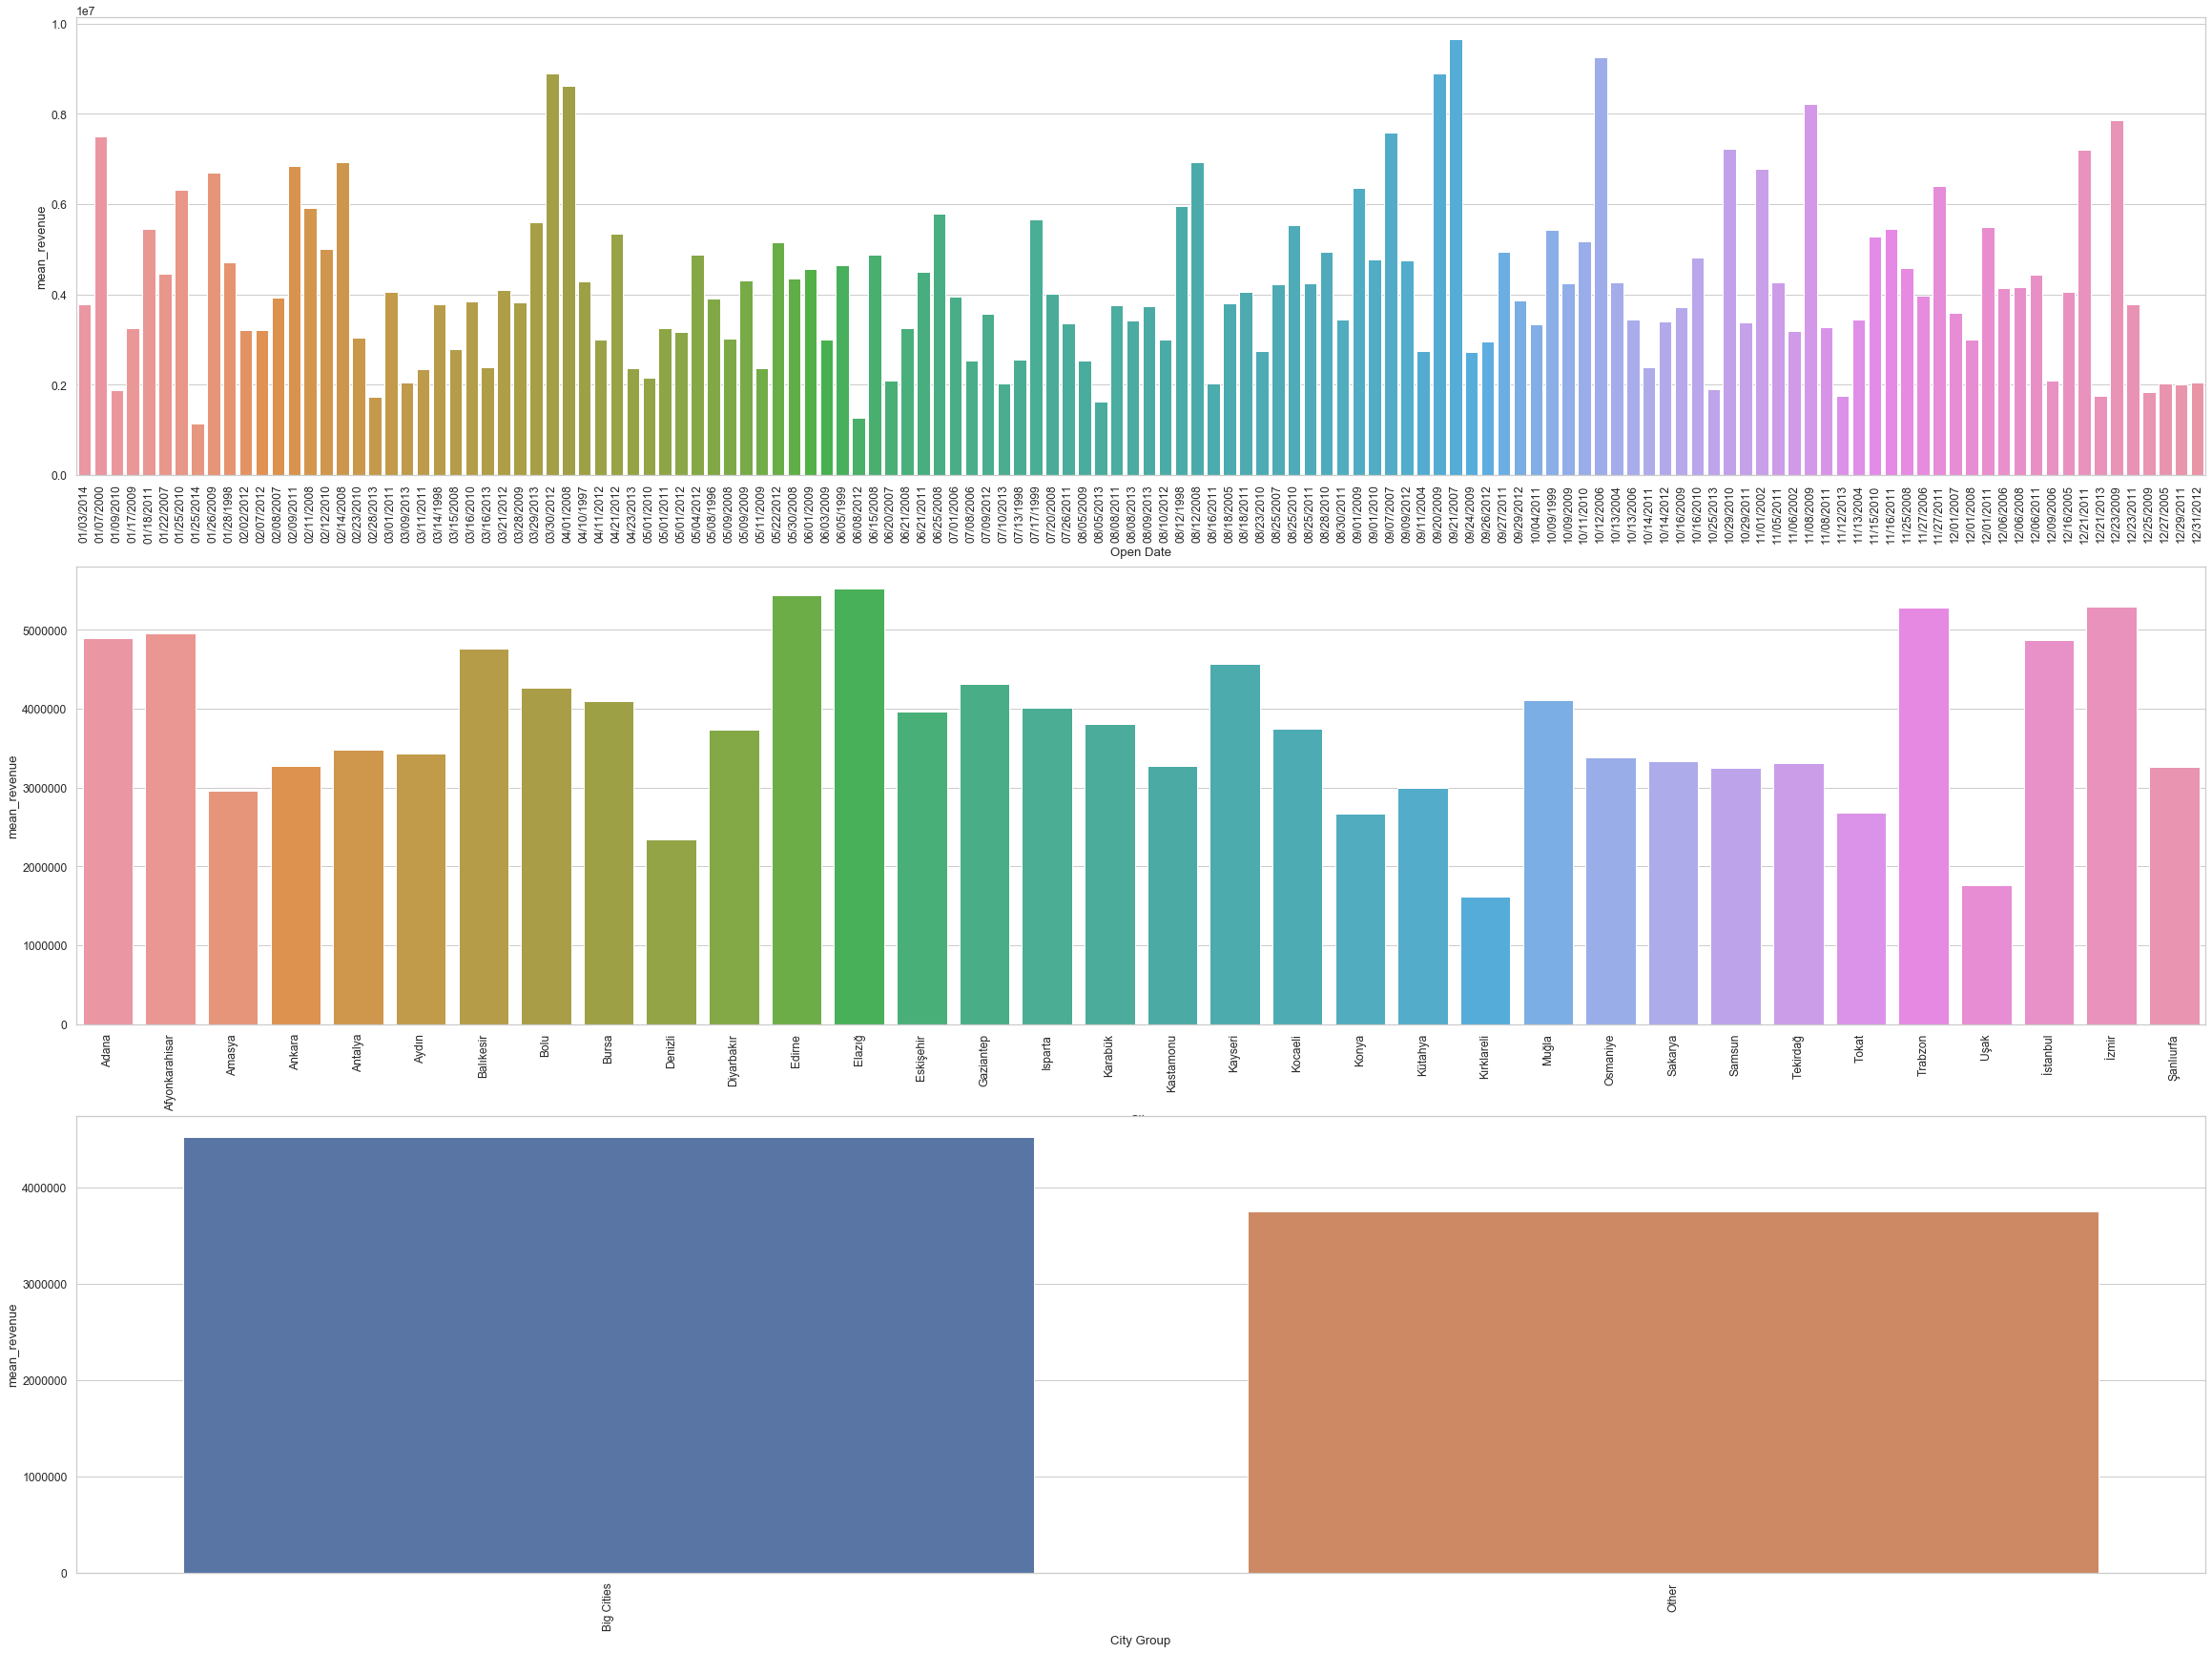

In [919]:
fig, ax = plt.subplots(3, 1, figsize=(40, 30))
for variable, subplot in zip(categorical_features, ax.flatten()):
    df_2 = train[[variable,'revenue']].groupby(variable).revenue.mean().reset_index()
    df_2.columns = [variable,'mean_revenue']
    sns.barplot(x=variable, y='mean_revenue', data=df_2 , ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [920]:
cats = train["City"].unique()
cats

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

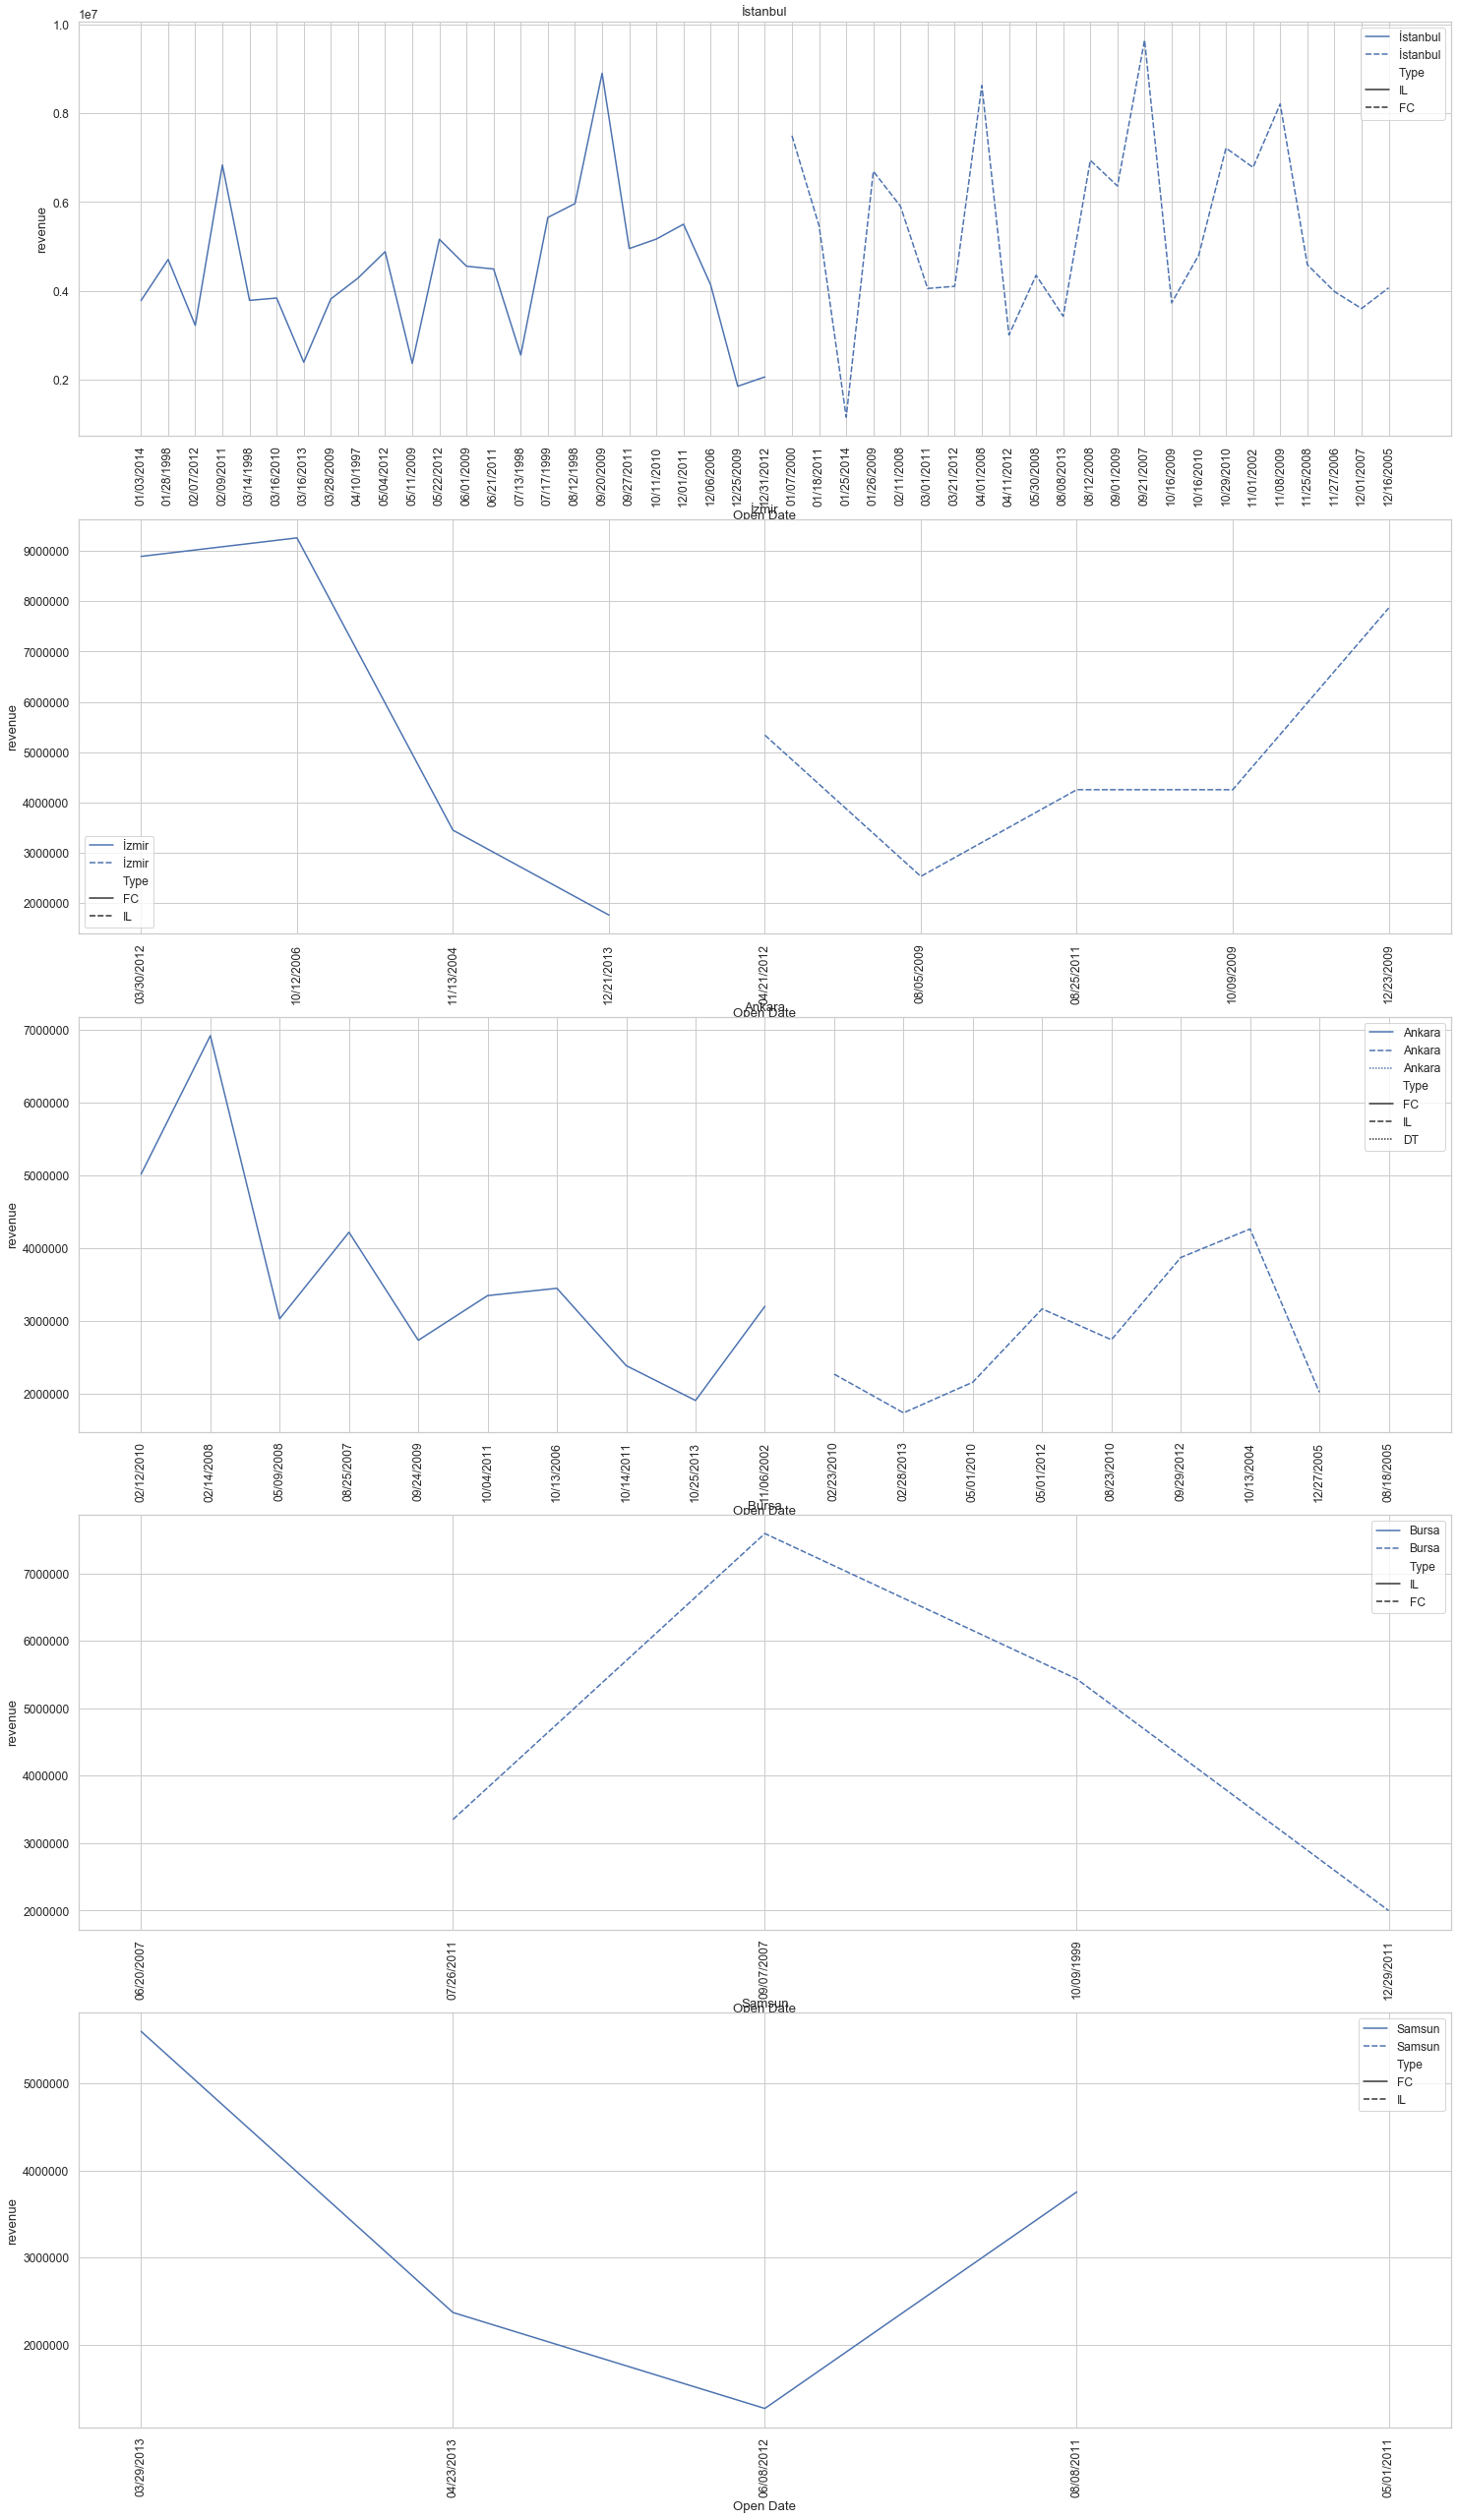

In [921]:
tem = train.copy()
#cats = train["City"].unique().tolist() 
#fig, ax = plt.sub plots(34, 1, figsize=(25, 400))
cats = ['İstanbul','İzmir','Ankara','Bursa','Samsun']
fig, ax = plt.subplots(5, 1, figsize=(25, 45))
for variable, subplot in zip(cats, ax.flatten()):
    #x = tem.where(train["City"]==variable, inplace = False)
    x = tem[train["City"]==variable]
    x = x.sort_values(by=['Open Date'])
    if len(x) <= 4:        
        g = sns.barplot(x="Open Date", y="revenue",hue="Type", data=x, ax=subplot)
        g.title.set_text(variable)
    else:
        g = sns.lineplot(x="Open Date", y="revenue", style = "Type",label=variable, linestyle="-", data=x, ax=subplot)
        g.title.set_text(variable)
        for label in subplot.get_xticklabels():
            label.set_rotation(90)

- Which is the best city to Open a resutrant ? # Istanbu

- What is the best time in year to open a resutrant in that city ? # first quarter of the year

- What is the best type of resturant to be opened ? #IL inline

In [922]:
# Transform Open date to age
from datetime import datetime

def count_years(open_date):
    date_parse = datetime.strptime(open_date, '%m/%d/%Y')
    date_now = datetime.now()
    return date_now.year - date_parse.year

In [924]:
open_years = []
for i in train['Open Date']:
    open_years.append(count_years(i))

df_open_years = pd.DataFrame({ 'open_years' : open_years } )
group_years = df_open_years['open_years'].value_counts()

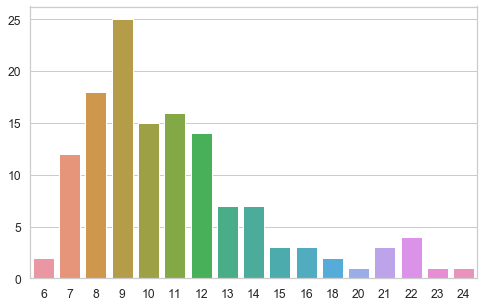

In [926]:
# Barplot open years
sns.barplot(x=group_years.index, y=group_years.values)

In [927]:
city_most = train['City'].value_counts()[train['City'].value_counts() > 2].index

In [928]:
city_transform = []

for i in train['City']:
    if i in city_most:
        city_transform.append(i)
    else:
        city_transform.append('other')
        
df_city_transform = pd.DataFrame({ 'city_transform' : city_transform } )
group_city = df_city_transform['city_transform'].value_counts()

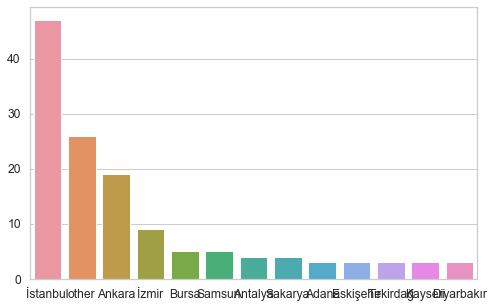

In [929]:
# Barplot cgroup city
sns.barplot(x=group_city.index, y=group_city.values)

In [930]:
data_train_copy = train.copy()
data_train_copy['revenue_log'] = np.log(data_train_copy['revenue'])

In [931]:
data_train_copy.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,revenue_log
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,15.547830
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,15.750379
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,14.535971
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,14.799651
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,15.278005


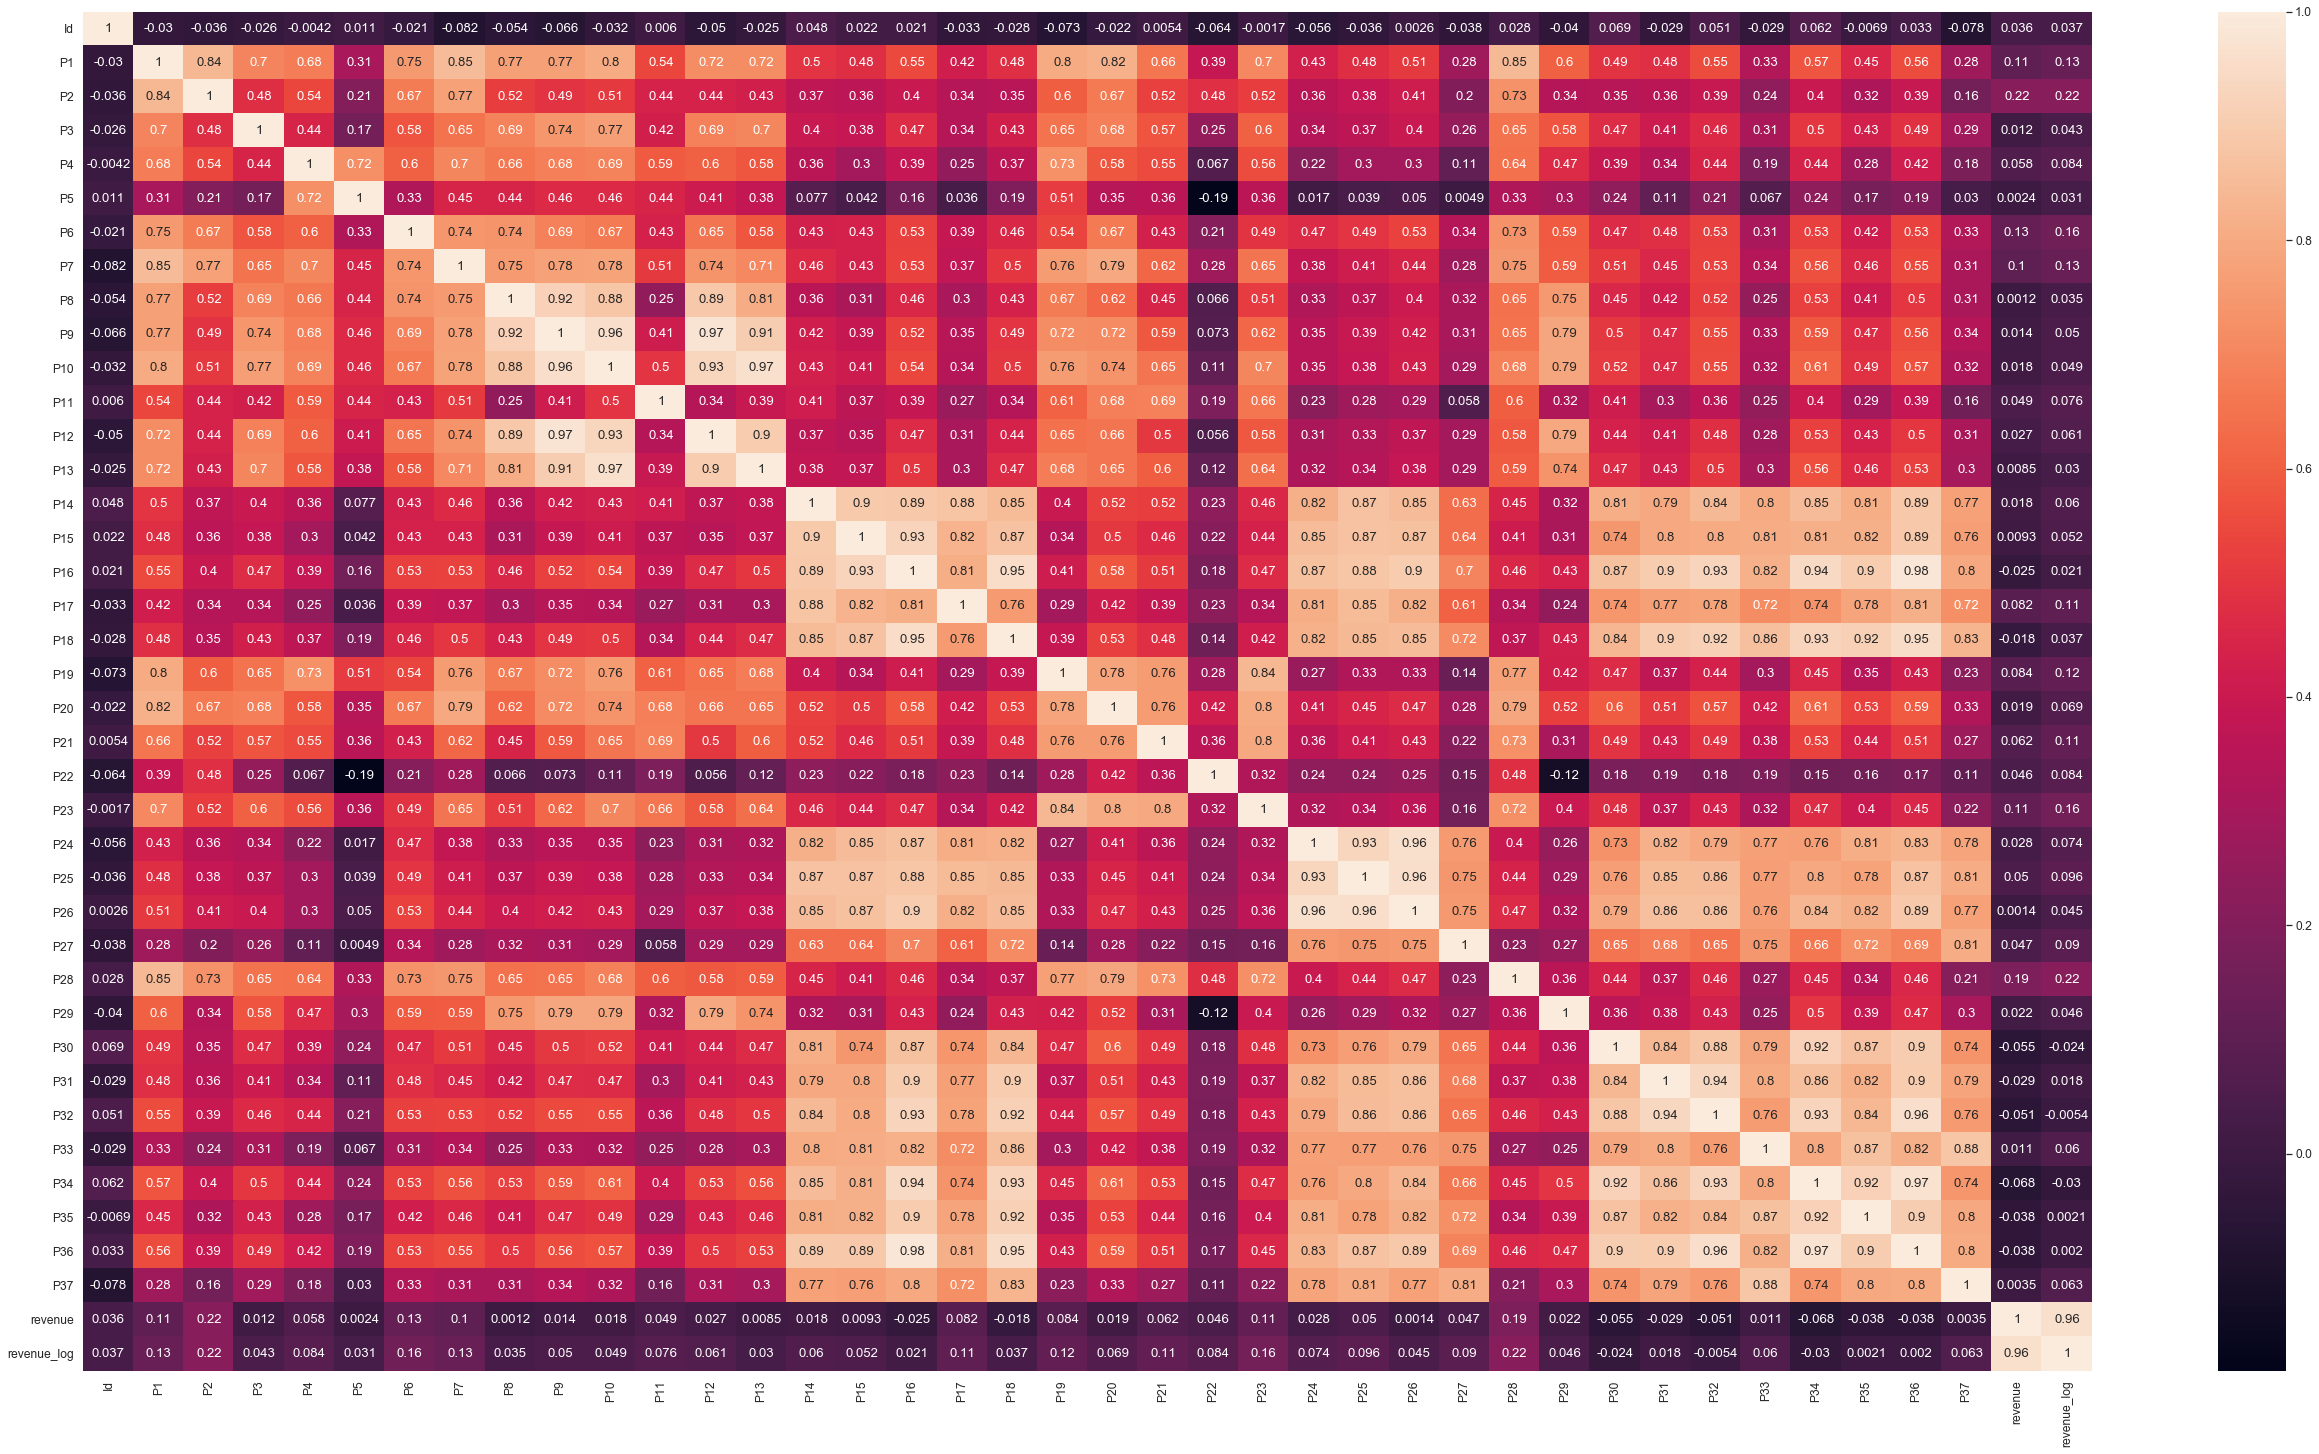

In [932]:
transformed_corr = data_train_copy.corr()
plt.figure(figsize=(45,25))
sns.heatmap(transformed_corr, annot=True)

In [872]:
attr_select = ['Open Date', 'City', 'City Group', 'Type', 'P2', 'P6', 'P7', 'P17', 'P19','P21','P23','P28','revenue_log']
attr_select2 = ['Open Date', 'City', 'City Group', 'Type', 'P2', 'P6', 'P7', 'P17', 'P19','P21','P23','P28']
train_select = data_train_copy[attr_select]
test_select = test[attr_select2]

In [937]:
train_select

,Open Date,City,City Group,Type,P2,P6,P7,P17,P19,P21,P23,P28,revenue_log
0,07/17/1999,İstanbul,Big Cities,IL,5.0,2,5,2,5,1,3,2.0,15.547830
1,02/14/2008,Ankara,Big Cities,FC,5.0,2,5,0,3,1,2,3.0,15.750379
2,03/09/2013,Diyarbakır,Other,IL,4.0,3,5,0,1,1,1,1.0,14.535971
3,02/02/2012,Tokat,Other,IL,4.5,4,10,3,20,6,10,2.5,14.799651
4,05/09/2009,Gaziantep,Other,IL,4.0,2,5,1,2,1,1,1.0,15.278005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,06/25/2008,Trabzon,Other,FC,3.0,2,4,0,4,2,1,2.0,15.571227
133,10/12/2006,İzmir,Big Cities,FC,5.0,3,5,0,3,2,1,3.0,16.041512
134,07/08/2006,Kayseri,Other,FC,4.0,3,5,0,2,1,2,2.0,14.749585
135,10/29/2010,İstanbul,Big Cities,FC,5.0,2,5,0,1,1,1,3.0,15.792038


In [934]:
# Transform Open date to age
from datetime import datetime


def count_years(open_date):
    date_parse = pd.to_datetime(open_date, format='%m/%d/%Y')
    date_now = datetime.now()
    return date_now.year - date_parse.year

In [938]:
# Transform Open Year
open_years = []
for i in train_select['Open Date']:
    open_years.append(count_years(i))
    
df_open_years = pd.DataFrame({ 'open_years' : open_years } )
group_years = df_open_years['open_years'].value_counts()
train_final = pd.concat([train_select, df_open_years], axis=1).drop(['Open Date'], axis=1)

# Transform Open Year
open_years = []
for i in test_select['Open Date']:
    open_years.append(count_years(i))
    
df_open_years = pd.DataFrame({ 'open_years' : open_years } )
group_years = df_open_years['open_years'].value_counts()
train_final = pd.concat([test_select, df_open_years], axis=1).drop(['Open Date'], axis=1)

In [819]:
trainData = train_final

In [821]:
testData = test_final
testData

,City Group,Type,P2,P6,P7,P17,P19,P21,P23,P28,open_years,city_transform
0,Other,FC,4.0,2,5,2,5,3,4,2.0,9,Niğde
1,Other,IL,4.0,2,5,0,5,3,1,1.0,9,Konya
2,Big Cities,FC,4.0,2,5,0,5,5,5,2.0,7,Ankara
3,Other,IL,4.0,3,5,0,4,3,2,2.0,7,Kocaeli
4,Other,FC,4.0,2,5,0,1,3,1,5.0,7,Afyonkarahisar
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Other,FC,5.0,2,5,0,3,1,2,2.0,20,Antalya
99996,Other,IL,2.0,1,1,1,1,1,2,1.0,9,Niğde
99997,Big Cities,IL,5.0,2,5,3,3,4,5,4.0,8,İstanbul
99998,Big Cities,FC,7.5,4,10,0,20,3,15,7.5,7,İstanbul


In [940]:
trainData

,City Group,Type,P2,P6,P7,P17,P19,P21,P23,P28,revenue_log,open_years,city_transform
0,Big Cities,IL,5.0,2.0,5.0,2.0,5.0,1.0,3.0,2.0,15.547830,21.0,İstanbul
1,Big Cities,FC,5.0,2.0,5.0,0.0,3.0,1.0,2.0,3.0,15.750379,12.0,Ankara
2,Other,IL,4.0,3.0,5.0,0.0,1.0,1.0,1.0,1.0,14.535971,7.0,Diyarbakır
3,Other,IL,4.5,4.0,10.0,3.0,20.0,6.0,10.0,2.5,14.799651,8.0,other
4,Other,IL,4.0,2.0,5.0,1.0,2.0,1.0,1.0,1.0,15.278005,11.0,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Other,FC,3.0,2.0,4.0,0.0,4.0,2.0,1.0,2.0,15.571227,10.0,İstanbul
133,Big Cities,FC,5.0,3.0,5.0,0.0,3.0,2.0,1.0,3.0,16.041512,11.0,İstanbul
134,Other,FC,4.0,3.0,5.0,0.0,2.0,1.0,2.0,2.0,14.749585,NaN,NaN
135,Big Cities,FC,5.0,2.0,5.0,0.0,1.0,1.0,1.0,3.0,15.792038,NaN,NaN


In [695]:
train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,revenue,open_years,city_transform
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3,4,5,5,4,3,4,5653753.0,21.0,İstanbul
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,6923131.0,12.0,Ankara
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,2055379.0,7.0,Diyarbakır
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,12,10,6,18,12,12,6,2675511.0,8.0,other
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,1,3,2,3,4,3,3,4316715.0,11.0,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,0,0,0,0,0,0,0,5787594.0,10.0,İstanbul
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,0,0,0,0,0,0,0,9262754.0,11.0,İstanbul
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,0,2544857.0,NaN,NaN
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,0,0,0,0,0,0,0,7217634.0,NaN,NaN


In [697]:
y= train.revenue
y

0      5653753.0
1      6923131.0
2      2055379.0
3      2675511.0
4      4316715.0
         ...    
132    5787594.0
133    9262754.0
134    2544857.0
135    7217634.0
136    6363241.0
Name: revenue, Length: 134, dtype: float64

In [701]:
x_train = train[train.columns[~train.columns.isin(['Open Date', 'revenue'])]]

In [721]:
x_train

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,open_years
0,0,31,0,2,4,5,4.0,4.0,2,1,...,3.0,5,3,4,5,5,4,3,4,13
1,1,3,0,1,4,5,4.0,4.0,1,1,...,3.0,0,0,0,0,0,0,0,0,6
2,2,10,1,2,2,3,2.0,5.0,2,2,...,3.0,0,0,0,0,0,0,0,0,1
3,3,28,1,2,6,4,6.0,6.0,4,3,...,7.5,25,12,10,6,18,12,12,6,2
4,4,14,1,2,3,3,3.0,4.0,2,1,...,3.0,5,1,3,2,3,4,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,29,1,1,2,2,3.0,5.0,4,1,...,3.0,0,0,0,0,0,0,0,0,4
133,133,32,0,1,4,5,4.0,4.0,2,2,...,3.0,0,0,0,0,0,0,0,0,5
134,134,18,1,1,3,3,4.0,4.0,2,2,...,3.0,0,0,0,0,0,0,0,0,18
135,135,31,0,1,4,5,4.0,5.0,2,1,...,3.0,0,0,0,0,0,0,0,0,17


In [722]:
x_test = test[test.columns[~test.columns.isin(['Open Date'])]]  #test features

In [723]:
x_train

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,open_years
0,0,31,0,2,4,5,4.0,4.0,2,1,...,3.0,5,3,4,5,5,4,3,4,13
1,1,3,0,1,4,5,4.0,4.0,1,1,...,3.0,0,0,0,0,0,0,0,0,6
2,2,10,1,2,2,3,2.0,5.0,2,2,...,3.0,0,0,0,0,0,0,0,0,1
3,3,28,1,2,6,4,6.0,6.0,4,3,...,7.5,25,12,10,6,18,12,12,6,2
4,4,14,1,2,3,3,3.0,4.0,2,1,...,3.0,5,1,3,2,3,4,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,29,1,1,2,2,3.0,5.0,4,1,...,3.0,0,0,0,0,0,0,0,0,4
133,133,32,0,1,4,5,4.0,4.0,2,2,...,3.0,0,0,0,0,0,0,0,0,5
134,134,18,1,1,3,3,4.0,4.0,2,2,...,3.0,0,0,0,0,0,0,0,0,18
135,135,31,0,1,4,5,4.0,5.0,2,1,...,3.0,0,0,0,0,0,0,0,0,17


In [726]:
x_test

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P30,P31,P32,P33,P34,P35,P36,P37,open_years,city_transform
0,0,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,0,9,Niğde
1,1,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,0,9,Konya
2,2,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,0,7,Ankara
3,3,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,0,4,0,0,0,0,0,0,7,Kocaeli
4,4,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,0,7,Afyonkarahisar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,0,20,Antalya
99996,99996,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,...,5,0,0,0,4,0,0,0,9,Niğde
99997,99997,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,...,5,5,3,2,4,4,4,2,8,İstanbul
99998,99998,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,...,0,0,0,4,0,0,0,0,7,İstanbul


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-720-8cf22068b2e5>", line 1, in <module>
    x_train.drop([delete_list], axis=1)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py", line 3997, in drop
    errors=errors,
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py", line 3936, in drop
    obj = obj._drop_axis(labels, axis, level=level, errors=errors)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py", line 3970, in _drop_axis
    new_axis = axis.drop(labels, errors=errors)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 5018, in drop
    raise KeyError(f"{labels[mask]} not found in axis")
KeyError: "[('P1', 'P3', 'P4', 'P5', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P18', 'P20', 'P21', '

KeyError: "[('P1', 'P3', 'P4', 'P5', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P18', 'P20', 'P21', 'P22', 'P24', 'P25', 'P26', 'P27')] not found in axis"

In [ ]:
del x_test['city_transform']

In [711]:
x_test

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,open_years
0,0,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,9
1,1,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,3.0,0,0,0,0,0,0,0,0,9
2,2,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,3.0,0,0,0,0,0,0,0,0,7
3,3,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,3.0,0,4,0,0,0,0,0,0,7
4,4,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,...,3.0,0,0,0,0,0,0,0,0,20
99996,99996,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,...,3.0,5,0,0,0,4,0,0,0,9
99997,99997,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,...,1.0,5,5,3,2,4,4,4,2,8
99998,99998,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,...,5.0,0,0,0,4,0,0,0,0,7
